In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
! pip install matplotlib --upgrade

# Unidad I. Variables, distribuciones y pruebas de hipótesis. 


- Estadística inferencial
  - test de hipótesis
  - Tipos de errores
  - Valor P
  - Test T de Student para una muestra.
  - Intervalo de confianza
  - Nivel de confianza
  - Bootstrap
- Prueba de bondad de ajuste a una distribución.
  - chi cuadrado
  - Kolmogorov-Smirnov
- Comparación de dos poblaciones
  - Tests de forma:
    - chi cuadrado
    - Kolmogorov-Smirnov
  - Tests de igualdad de varianza
    - Test F
    - Test de Bartlett
    - Test de Levenne
  - Test de igualdad de medias:
    - T test para dos muestras.
    - Test de Student para variables apareadas.
  - Alternativas no paramétricas.
    - test de Mann Whitney
    - test de Wicolxon.
    - test de la Mediana.
  - Test para variables cualitativas
    - test de fisher.
    - test de McNemar.


## Estadística inferencial

- Trata de inferir información acerca de la distribución de probabilidad de una
  población
    - Parte de la información de una muestra.
- Tipos de intervalo de inferencias:
    - Estimación puntual:
      - Estimación de un parámetro poblacional haciendo uso del valor que mejor
        lo aproxime.
    - Estimación por intervalos:
      - Estimación de un intervalo de valores para un parámetro poblacional
        desconocido.
      - Por ejemplo, la estimación de un intervalo de confianza.



### Test de hipótesis

- Es la evaluación estadítica de una suposición.
  - Se parte de considerar declaración que puede o no ser válida
  - A partir de esta declaración se definen dos hipótesis:
    - la hipótesis nula ($H_0$)
      - Típicamente implica que no hay una relación entre los datos o variables.
    - la hipótesis alternativa ($H_1$)
      - Esta es la hipótesis que queremos apoyar.
  - Se obtienen una muestra de datos para evaluar la hipótesis.
  - Si los datos apoyan $H_1$ con cierto nivel de confianza:
    - rechazo $H_0$ y acepto con $H_1$
    - No quiere decir que se haya demostrado $H_1$
  - Si los datos no apoyan $H_1$
    - no puedo rechazar $H_1$, ni aceptar $H_0$

### Tipos de errores

|                      | **$H_0$ es cierta**    | **$H_1$ es cierta**     |
|-------------------   |-------------------     |--------------------     |
| **Se escogió $H_1$** | *Error de tipo I* (FP) | Decisión correcta       |
| **Se escogió $H_0$** | Decisión correcta      | *Error de tipo II* (FN) |


La probabilidad del error de tipo I
  - se conoce como nivel de significación estadistica
  - indicado con la letra griega $\alpha$.
  - $P(escoger H_1 | H_0 cierta) = \alpha$

La probabilidad de caer en un error del tipo II
  - se anota con la letra griega $\beta$.
  - Siendo $1-\beta$ la potencia o poder del test.
  - $P(escoger H_0 | H_1 cierta) = \beta$
  - $P(escoger H_1 | H_1 cierta) = 1 - \beta$


### Valor P

- El valor P (*p value*)
  - Es la probabilidad de observar:
    - un determinado valor (o uno más extremo)
    - dado que H₀ es correcta.
  - No es la probabilidad de la hipótesis nula.
  - Un valor P bajo indica:
    - que los datos son inconsistentes con la hipótesis nula
    - permitiéndonos rechazarla
    - Para decidir que es un valor bajo
      - se recurre al valor de significación α.
      - debo elegir cuanto error puedo tolerar

### Test de T de Student para una muestra

- Permite evaluar si
  - la media de una muestra es diferente de una media $\mu_0$.
- El uso del test supone:
  - Distribución normal de la variable (continua) en la población
  - Muestreo al azar (cada observación es independiente)
- El estadístico $t$ sigue una distribución *T de Student* con $n - 1$ grados de libertad.
  - $ t = \frac{ \bar{x} - \mu }{ \frac{s}{\sqrt{n}} }$



Supongamos una variable aleatoria $X$ que en la población se distribuye con una
distribución $N(0, 1)$.

- Estamos interesados en apoyar la hipótesis de que la media de esa variable $X$
  en la población es mayor a 0.
  - $H_0 : \mu = 0$
  - $H_1 : \mu > 0$
- el *p value* para un valor observado $T$ será:
  - $P(t \ge T|H_0)$

In [ ]:
import scipy.stats as st
import math

normal_sample = st.norm.rvs(size = 10, loc=1.0)
df = len(normal_sample) - 1 # 9

# Calculando a mano
t_value = (normal_sample.mean() - 0) / (normal_sample.std()/math.sqrt(df))
# t_value
pvalue = 1 - st.t.cdf(t_value, df)
print(f"El valor del estadístico T es {t_value}")
print(f"El p-valor es {pvalue}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)

plt.plot(x, st.t.pdf(x, df))

x_fill = np.linspace(t_value, 4, 100)
plt.fill_between(
    x_fill,
    st.t.pdf(x_fill, df),
    color="lightblue"
)

plt.annotate(
    xy = ((4+t_value)/2, st.t.pdf((4+t_value)/2, df)/2),
    xytext = (1, 0.38),
    text = f"p-valor = 1 - $CDF_T(t) = {1-st.t.cdf(t_value, df):0.3f}$",
    arrowprops = {
        "arrowstyle":"->"
    }
)
plt.tight_layout()

In [ ]:
# Usando scipy
test_result = st.ttest_1samp(
    normal_sample,
    popmean=0,
    alternative="greater",
)
test_result

- Podemos definir diferentes hipótesis alternativas:
- Es necesario cambiar la definición del *valor P* para estos casos:
  - $H_1 > 0$ (Una cola, mayor)
    - $p_{value} = 1 - CDF_T(t)$
    - El ejemplo anterior
  - $H_1 < 0$ (Una cola, menor)
    - $p_{value} = CDF_T(t)$
  - $H_a \ne 0$ (dos colas)
    - $p_{value} = 2 \times min(CDF_T(t), 1-CDF_T(t))$


In [ ]:
one_tail_greater = 1 - st.t.cdf(t_value, df)
one_tail_lower = st.t.cdf(t_value, df)

two_tails = 2 * min(one_tail_greater, one_tail_lower)
print(f"El pvalue de una cola, mayor es {one_tail_greater}")
print(f"El pvalue de una cola, menor es {one_tail_lower}")
print(f"El pvalue de dis colas es {two_tails}")

In [ ]:
one_tail_greater = st.ttest_1samp(normal_sample, popmean = 0, alternative = "greater")
one_tail_lower = st.ttest_1samp(normal_sample, popmean = 0, alternative = "less")
two_tails = st.ttest_1samp(normal_sample, popmean = 0, alternative = "two-sided")
print(f"El pvalue de una cola, mayor es {one_tail_greater.pvalue}")
print(f"El pvalue de una cola, menor es {one_tail_lower.pvalue}")
print(f"El pvalue de dis colas es {two_tails.pvalue}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
x1 = np.linspace(2, 5, 100)
x2 = np.linspace(-5, 2, 100)
x3 = np.linspace(-5, -2, 100)

fig, axes = plt.subplots(figsize = (6, 9), nrows = 3)

axes[0].plot(x, st.t.pdf(x, 9))
axes[0].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[0].set_title("Una cola (mayor)")

axes[1].plot(x, st.t.pdf(x, 9))
axes[1].fill_between(x2, st.t.pdf(x2, 9), color="lightblue")
axes[1].set_title("Una cola (menor)")

axes[2].plot(x, st.t.pdf(x, 9))
axes[2].fill_between(x3, st.t.pdf(x3, 9), color="lightblue")
axes[2].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[2].set_title("Dos colas")

En el caso del test de dos colas:
- Parece evidente:
  - multiplicar por dos al de menor de los p-valores las colas.
- Esto es por la simetría de la distribución.
- En distribuciones asimétricas, no es evidente que hacer:
  - En general se toma la idea de doblar el p-valor menor.

En particular, para una variable aleatoria $X$, que sigue una determinada
distribución si $H_0$ es cierta, dado un estimador $x_0$, el *p value* es:

### Intervalo de confianza

Es un tipo de estimador por intervalo
- para un parámetro de la población.
- Se calcula a partir de una o más muestras
- posee un **nivel de confianza**
  - qué tan frecuentemente una serie de intervalos estimados de la misma manera
  - contiene al parámetro poblacional.
- Un intervalo de confianza del 95%
  - No significa que hay un probabilidad del 95% de contener el parámetro.
- Para una muestra dada
  - Puede darse que el parámetro estimado quede afuera del intervalo.
- Intervalo = $(\bar{x}-t\frac{s}{\sqrt{n}} , \bar{x}+t\frac{s}{\sqrt{n}})$
  - El valor t se elige dependiendo de la confidencia que queremos.
  - $t = Cuantil_T(\alpha / 2)$
  - $\alpha$ es 1 - la confidencia del rango
    - al 95%, $\alpha$ es 0.05

In [ ]:
from matplotlib.patches import FancyArrowPatch

interval = st.t.interval(
    alpha = 0.95,
    df = len(normal_sample) - 1,
    loc = normal_sample.mean(),
    scale = normal_sample.std() / math.sqrt(df)
)
print(f"El intervalo es: {interval}")

interval2 = (
    normal_sample.mean() + st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9)),
    normal_sample.mean() - st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9))
)
print(f"El intervalo es: {interval2}")

fig, axes = plt.subplots()
axes.hist(normal_sample, 5)

patch = FancyArrowPatch(
    (interval[0], 1),
    (interval[1], 1),
    arrowstyle = "|-|",
    mutation_scale = 10
)
axes.add_patch(patch)
fig.tight_layout()


### Nivel de confianza


In [ ]:
import pandas as pd
samples_1000 = pd.Series(np.zeros(1000)).apply(
    st.norm.rvs,
    size = 10
)

intervals = samples_1000.map(
    lambda x: st.t.interval(
        alpha = 0.95,
        df = 9,
        loc = x.mean(),
        scale = st.sem(x)
    )
).explode().to_numpy().reshape((1000,2))

success_ratio = (
    (intervals.T[0] <= 0) & (intervals.T[1] >= 0)
).sum() / 1000
print(
    f"El {success_ratio*100:0.2f}% de las muestras tienen un "
    "intervalo de confianza que contiene la media poblacional"
)


### Bootstrap

- Se usa para obtener:
  - estimaciones puntuales o por intervalos
    - en particular, intervalos de confianza
  - para parámetros poblacionales
  - sin necesidad de conocer la distribución subyacente.
- se basa en hacer un muestreo aleatorio con reemplazo de nuestra muestra,
  - calculando el parámetro de interés en cada sub-muestra.
- La muestra inicial debe:
  - tener valores independientes
  - idénticamente distribuidos.
- puede presentar problemas con distribuciones discretas y poco densas.


In [ ]:
main_sample = st.norm.rvs(size=100)

replicate = pd.Series(
    [
        np.random.choice(
            main_sample,
            size = 25
        )
        for _ in range(10000)
    ]
)
means = replicate.apply(np.mean)
plt.hist(means, bins = 20)
interval = [
    means.quantile(0.025),
    means.quantile(0.975)
]
print(interval)


## Pruebas de ajuste de una muestra a una distribución.

- Permite medir que tan verosimil es que una muestra haya sido obtenida
  aleatoriamente de una distribución teórica dada.



### Prueba χ²

Se puede utilizar para testear la bondad de ajuste de:
- cualquier distribución univariada
  - para la cual se pueda calcular la *CDF*.
- Requiere datos en grupos
  - Para poder utilizar el test en una distribución continua
    debemos discretizar los datos (como en un histograma)
- Es sensible a la elección de los bins.
- El tamaño muestral debe ser relativamente grande.
- $ χ^{2} = \sum_{i=1}^{k}{\frac{(O_i - E_i)^{2}}{E_i}} $
- Es necesario indicar los grados de libertad.
  - número de categorías que pueden variar libremente en un análisis.

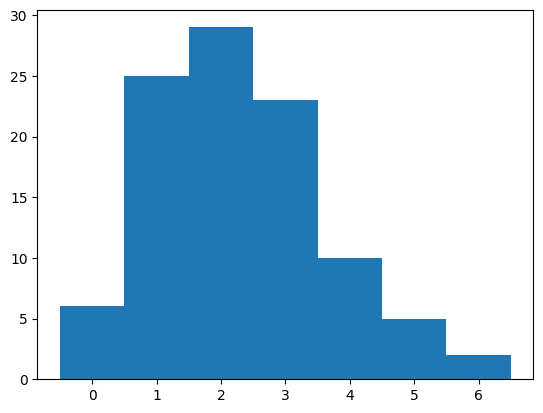

In [250]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

observed = st.binom.rvs(n=10, p=0.2, size = 100)

values = np.unique(observed)
values.sort()
mval = max(values)

_ = plt.hist(
  observed,
  bins = range(mval+1),
  width = 1,
  align = "left"
)


In [260]:
obs_cdf = st.cumfreq(
  observed,
  numbins=mval+1,
  defaultreallimits = (0, mval)
).cumcount

teoretical_cdf = st.binom.cdf(
  np.arange(mval+1),
  n=10,
  p=0.2
)

teoretical_cdf = teoretical_cdf * sum(obs_cdf) / sum (teoretical_cdf)

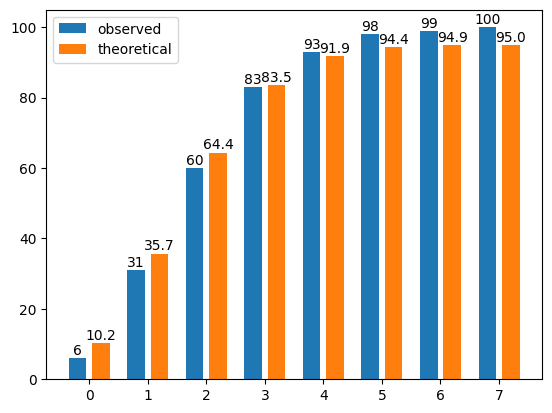

In [261]:
fig, axes = plt.subplots()

axes.bar(np.arange(mval+1)-0.2, obs_cdf, width = 0.3, label = "observed")
axes.bar(np.arange(mval+1)+0.2, teoretical_cdf, width = 0.3, label = "theoretical")

for x, y in zip(np.arange(mval+1)-0.2, obs_cdf):
  axes.text(x, y+1, f"{y:0.0f}", ha="center")
for x, y in zip(np.arange(mval+1)+0.2, teoretical_cdf):
  axes.text(x, y+1, f"{y:0.1f}", ha="center")

_ = axes.legend()

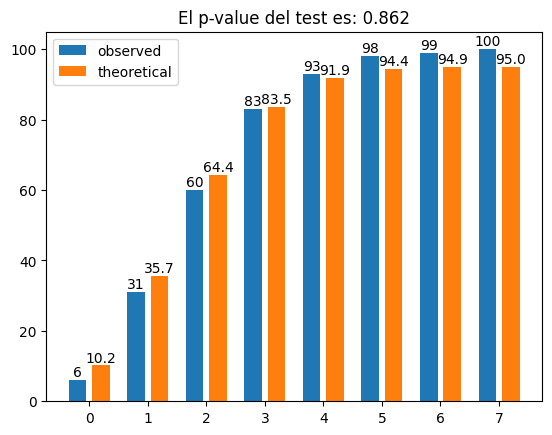

In [266]:
resultado = st.chisquare(
  f_obs=obs_cdf,
  f_exp=teoretical_cdf
)

axes.set_title(f"El p-value del test es: {resultado.pvalue:0.3f}")
fig

### Prueba de Kolmogórov-Smirnov

- Usa la función de densidad acumulada (*CDF*).
- Hipótesis Nula y Alternativa:
  - Hipótesis Nula (H0): La muestra sigue la distribución teórica propuesta.
  - Hipótesis Alternativa (H1): La muestra no sigue la distribución teórica propuesta.
- Su estadístico, $D$:
  - mide la distancia entre:
    - la *CDF* de la distribución de la hipótesis nula,
    - y la *CDF* de la muestra.
  - Es el valor máximo de las diferencias.
  - $D=0$ si ambas distribuciones acumuladas son idénticas.
- La distribución nula debe ser **continua**.
- No tiene gran poder
  - puede requerir un tamaño muestral grande para rechazar la hipótesis nula.

In [243]:
import scipy.stats as st

sample_size = 100
sample_one = st.norm.rvs(size=sample_size)

In [92]:
sample_one_ecdf_x = sample_one.copy()
sample_one_ecdf_x.sort()
sample_one_ecdf_y = np.arange(sample_size)/sample_size

In [94]:
normal_cdf_y = st.norm.cdf(sample_one_ecdf_x)

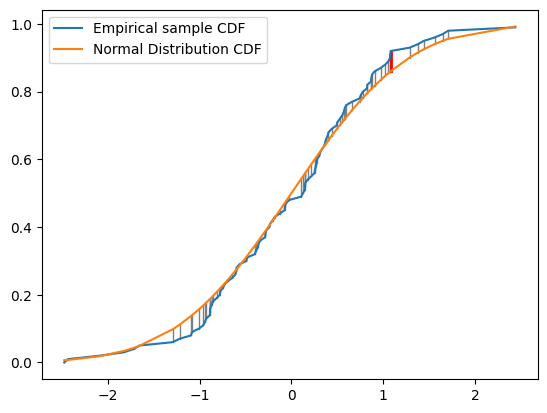

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

max_diff_index = np.argmax(np.abs(sample_one_ecdf_y - normal_cdf_y))

for i, (x, y1, y2) in enumerate(zip(sample_one_ecdf_x, sample_one_ecdf_y, normal_cdf_y)):
  color = "gray" if i != max_diff_index else "red"
  lwd = 1  if i != max_diff_index else 2
  axes.plot([x, x], [y1, y2], color=color, linewidth = lwd)

axes.plot(
  sample_one_ecdf_x,
  sample_one_ecdf_y,
  label = "Empirical sample CDF"
)
axes.plot(
  sample_one_ecdf_x,
  normal_cdf_y,
  label = "Normal Distribution CDF"
  )

_ = axes.legend()

In [75]:
st.kstest(sample_one, st.norm.cdf)

KstestResult(statistic=0.2786353283824235, pvalue=0.3518648922026435)

## Comparación de dos muestras


### Tests de forma

#### Test de Kolmogorov-Smirnov

- Una variante del test del mismo nombre ya visto.
  - Permite comparar dos muestras
  - La hipótesis nula es que ambas provienen de la misma población.

In [267]:
import scipy.stats as st

sample_one = st.norm.rvs(size=250)
sample_two = st.norm.rvs(size=250)
sample_three = st.t.rvs(1, size=250)

same_dist_res = st.kstest(sample_one, sample_two)
print(f"El pvalue para dos muestras de la misma población es:", same_dist_res)
diff_dist_res = st.kstest(sample_one, sample_three)
print(
    f"El pvalue para dos muestras de diferentes poblaciones es:",
    diff_dist_res
)


El pvalue para dos muestras de la misma población es: KstestResult(statistic=0.068, pvalue=0.6109101078019121)
El pvalue para dos muestras de diferentes poblaciones es: KstestResult(statistic=0.14, pvalue=0.014800376509095043)


#### Test de $\chi2$ para dos muestras

- Requiere agrupar los datos en *bins*
- Es sensible a:
  - valores extremos.
  - Cantidad de *bins*


In [270]:
# Genero las muestras
sample_one = st.norm.rvs(size=100)
sample_two = st.norm.rvs(size=100)
# Agrupo los datos en categorias
maxval = np.concatenate((sample_one, sample_two)).max()
minval = np.concatenate((sample_one, sample_two)).min()
s1hist = np.histogram(sample_one, bins=5, range=(minval, maxval))
s2hist = np.histogram(sample_two, bins=5, range=(minval, maxval))
print(
    f"El primer grupo es: {s1hist[0]}\n",
    f"El segundo grupo es: {s2hist[0]}"
)

El primer grupo es: [ 0 12 29 38 21]
 El segundo grupo es: [ 5 16 35 34 10]


In [280]:
# Calculo las frecuencias esperadas:
fexp = (s1hist[0] + s2hist[0])/2
fexp = np.array([fexp, fexp])

# Genero un array 2D con los datos observados
fobs = np.array([s1hist[0], s2hist[0]])

print(f"Las frecuencias esperadas son:\n{fexp}\n")
print(f"Los datos observados son:\n{fobs}\n")
dof = len(fobs[0])-1
print(f"Los grados de libertad son: {dof}")


Las frecuencias esperadas son:
[[ 2.5 14.  32.  36.  15.5]
 [ 2.5 14.  32.  36.  15.5]]

Los datos observados son:
[[ 0 12 29 38 21]
 [ 5 16 35 34 10]]

Los grados de libertad son: 4


In [275]:
st.chisquare(
    f_obs = fobs.ravel(),
    f_exp = fexp.ravel(),
    ddof = fobs.size - 1 - dof
)

# DOFcomputed = size - 1 - ddof = size - 1 - (size - 1 - dof) =>
# DOFcomputed = dof

Power_divergenceResult(statistic=10.259376600102405, pvalue=0.03627797759368743)

Otra opción es usar tablas de contigencia

In [274]:
chi2, p, dof, ex = st.chi2_contingency(fobs)
print(chi2, p, dof, ex)

10.259376600102405 0.03627797759368743 4 [[ 2.5 14.  32.  36.  15.5]
 [ 2.5 14.  32.  36.  15.5]]


Usando tablas de contingencia podemos comparar distribuciones de variables
categóricas.


In [292]:
import pandas as pd
from time import time_ns, sleep
marcas = ["MarcaA", "MarcaB", "MarcaC", "MarcaD", "MarcaE"]

grupos = [
    "Niños",
    "Jovenes",
    "Adultos"
]

sample_size = 50
data = []
for g in grupos:
    # np.random.seed(3)
    freqs = np.random.uniform(size=len(marcas))
    freqs = freqs/freqs.sum()
    sample_summary = st.multinomial.rvs(
        sample_size,
        freqs,
        1,
        random_state = time_ns() % 323
    ).squeeze()
    data.append(sample_summary)
data = np.array(data)
data.T
data = pd.DataFrame(
    data = data,
    index = grupos,
    columns = marcas
)
data

,MarcaA,MarcaB,MarcaC,MarcaD,MarcaE
Niños,7,12,17,0,14
Jovenes,11,4,12,16,7
Adultos,0,2,12,17,19


In [293]:
chi2, pval, dof, ex = st.contingency.chi2_contingency(data)
print(f"El pvalue es {pval}")

El pvalue es 9.246816826192998e-07


### Tests de igualdad de varianza

In [ ]:
import sklearn.datasets as datasets

iris = datasets.load_iris(as_frame=True)

iris["frame"].groupby("target").var()

#### F test de igualdad de varianzas

- Asume que las dos distribuciones son normales
- La hipótesis nula es que las varianzas son iguales.
- Se calcula un estadístico F.
- Luego se calcula un p-value de acuerdo a la distribución F teórica.

In [ ]:
g1 = iris["frame"].loc[iris["frame"]["target"]==0, "sepal width (cm)"]
g2 = iris["frame"].loc[iris["frame"]["target"]==1, "sepal width (cm)"]

fig, axes = plt.subplots()
for i, d in enumerate((g1, g2)):
  x = np.linspace(-0.3, 0.3, len(d))
  axes.scatter(x+i, d-d.mean(), label = f"G{i+1}")
axes.set_ylim(-2, 2)
axes.legend(loc="lower left")
axes.set_ylabel("data - mean(data)")
axes.set_xlabel("Grupos")
axes.set_xticks([])
plt.legend()
fig.tight_layout()


Comprobemos que las distribuciones "son" normales.

In [ ]:
r1 = st.shapiro(g1)
r2 = st.shapiro(g2)
for x in (r1, r2):
  print(x.pvalue)

Calculamos el estadístico F y el pvalue.

In [ ]:
import matplotlib.pyplot as plt

f_statistic = g2.var() / g1.var()
pvalue = 1 - st.f.cdf(
  f_statistic,
  g1.size-1,
  g2.size-1
)

pvalue2 = st.f.cdf(
  f_statistic,
  g1.size-1,
  g2.size-1
)

x = np.linspace(0, 2.5, 100)
xf = np.linspace(0, f_statistic, 100)

plt.plot(x, st.f.pdf(x, g1.size-1, g2.size-1))
plt.fill_between(xf, st.f.pdf(xf, g1.size-1, g2.size-1), color="lightblue")
plt.annotate(
  xy = (1.6, 0.15),
  xytext = (1.35, 0.75),
  text = f"$P_{{val}}$ = $1-CDF_F(f)$ = {pvalue:0.3f}",
  arrowprops = {"arrowstyle": "->"},
  fontsize = 14
)
plt.scatter([f_statistic], [0], color = "green")
plt.annotate(
  xy = (f_statistic, 0),
  xytext = (0.6, 0.35),
  text = f"F = $\\frac{{S_{{g1}}^2}}{{S_{{g2}}^2}}$ = {f_statistic:0.2f}",
  arrowprops = {"arrowstyle": "->"},
  fontsize = 14
)
plt.tight_layout()

print(f"F es: {f_statistic}")
print(f"El pvalue es: {pvalue}")


#### Test de igualdad de varianzas de Bartlett

- Asume que las distribuciones son normales.
- Es sensible a alejamientos de la normalidad.
- Se puede utilizar con varias muestras simultáneamente.


In [ ]:
a = st.bartlett(g1, g2)
b = 1 - st.chi2.cdf(a.statistic, 1)
print(a, b)


In [ ]:
import matplotlib.pyplot as plt

A = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
B = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
D = [59, 68, 99, 93, 72, 65, 73, 82, 72, 89]

a = st.bartlett(A, B, C, D)
b = 1 - st.chi2.cdf(a.statistic, 3)
fig, axes = plt.subplots()
for i, d in enumerate((A, B, C ,D)):
    x = np.linspace(-0.3, 0.3, len(d))
    axes.scatter(x+i, d, label = f"G{i}")
axes.set_ylim(20, 110)
axes.legend(loc="lower left")
axes.text(
    x = 1.5,
    y = 30,
    s = (
        f"Bartlett Statistic ($B_S$) = {a.statistic:0.3f}\n"
        f"Bartlett P-Value = {a.pvalue:0.5f}\n"
        f"$1 - CDF_T(B_S)$ = {b:0.5f}"
    )
)
fig.tight_layout()

#### Test de igualdad de varianzas de Levene

- Es más robusto ante distribuciones no normales.
- Se calcula un estadístico W
  - $A = {\sum_{i=1}^{N}N_i(\bar{Z}_{i.}-\bar{Z}_{..})^2}$
  - $B = {\sum_{i=1}^k\sum_{j=1}^{N_i}(Z_{ij}-\bar{Z}_{i.})^2}$
  - $Z = |Y_{ij} - \bar{Y}_{i.}|$
  - $W = \frac{N-k}{k-1}\frac{A}{B}$
- Luego se calcula el p-value sobre la función $F_{k-1,N-k}$

In [ ]:
levene_result = st.levene(g1, g2)
levene_stat = levene_result.statistic
levene_pval = levene_result.pvalue
print(1 - st.f.cdf(levene_stat, 1, 98))
print(levene_pval)

### Test de igualdad de medias

### Test de Student para dos muestras

- Asume que las varianzas son iguales
  - existe una alternativa a este test:
    - test de Welch
    - no requiere asumir esta condición

In [ ]:
sample_one = st.lognorm.rvs(
    s=1,
    size = 30
)
sample_two = st.norm.rvs(
    scale = st.lognorm.std(s=1),
    size = 30,
    loc = st.lognorm.mean(s=1)
)
plt.hist(
    [
        sample_one,
        sample_two
    ],
    bins = 10
)
plt.xlim(-3, 7)

m1 = sample_one.mean()
m2 = sample_two.mean()
plt.plot([m1, m1],[0, 5], color = "red")
plt.annotate(
    xy = [m1, 5],
    xytext = [0.95, 0.95],
    ha = "right",
    text = "Mean LogNormal",
    textcoords = "axes fraction",
    arrowprops = {"arrowstyle":"->"}
)
plt.plot([m2, m2],[0, 5], color = "green")
plt.annotate(
    xy = [m2, 5],
    xytext = [0.95, 0.85],
    textcoords = "axes fraction",
    ha = "right",
    text = "Mean Normal",
    arrowprops = {"arrowstyle":"->"}
)

st.ttest_ind(sample_one, sample_two)

#### Test de Student para muestras apareadas

- Las mediciones de ambas muestras
  - corresponden a los mismos individuos
  - en dos condiciones diferentes.
  - Por ejemplo, antes y después de un tratamiento.

In [ ]:
sample_one = st.uniform.rvs(size=20)
effect = st.uniform.rvs(scale=0.01, size = 20)
sample_two = sample_one + effect
sample_three = st.uniform.rvs(size=20, loc=0.15)

with_effect = st.ttest_rel(sample_one, sample_two)
without_effect = st.ttest_rel(sample_one, sample_three)
print(f"El pvalue con efecto es {with_effect.pvalue}")
print(f"El pvalue sin efecto es {without_effect.pvalue}")

### Alternativas no paramétricas

#### Mann Whitney U Test

- Es un test no paramétrico.
- Asume que:
  - Las observaciones son independientes en ambos grupos.
- La hipótesis nula asume que las distribuciones de las dos poblaciones son
  iguales.
- Es semejante a un test de medias:
  - Dados x, y
    - Tomados de las muestras X e Y
  - La probabilidad de x > y es la misma que la de y > x


In [ ]:
sample_one = st.binom.rvs(n=10, p=0.3, size=20)
sample_two = st.binom.rvs(n=10, p=0.45, size=80)

st.mannwhitneyu(sample_one, sample_two)


#### Wilcoxon signed rank text

- Test para muestras pareadas
- La hipótesis nula es que no hay un efecto:
  - Se comprueba analizando el signo de las diferencias de ambas muestras.
  - Se verifica si tiene una distribución binomial con p=0.5

In [ ]:
sample_one = st.expon.rvs(size= 25)
effect = st.uniform.rvs(size=25, scale=0.01)
errors = st.norm.rvs(size=25, scale=0.01)
sample_two = sample_one + effect + errors

st.wilcoxon(sample_one, sample_two)

Ejercicio: Calcular el pvalue usando la CDF de la distribución binomial.


### Test de la mediana

- Es un caso especial de la prueba de **chi-cuadrado**.
- Se genera una tabla de contingencia:
    - Se calcula la mediana para todos los datos ($x$ e $y$)
    - Se arman grupos:
      - por encima o por debajo de la mediana.
      - las variables $x$ y $y$.
- Esta prueba posee poco poder.

In [ ]:
sample_one = st.uniform.rvs(size = 25)
sample_two = st.uniform.rvs(size = 45, loc=0.5)
global_median = np.median(np.concatenate([sample_one, sample_two]))
global_median
data = [
    [
        (sample_one<=global_median).sum(),
        (sample_one>global_median).sum()
    ],
    [
        (sample_two<=global_median).sum(),
        (sample_two>global_median).sum()
    ],
]
data = np.array(data)
data
stat, pval, df, ex = st.contingency.chi2_contingency(data)
print(f"El p-value es {pval}")

#### Test de Fischer

- Se usa para determinar si existe
  - una asoociación significante entre dos variables nominales.
- Es una variante al test $\chi^2$ cuando hay pocas cuentas.
- Se comparan:
  - dos grupos
  - dos variables
  - Tabla de contingencia $2\times2$



In [ ]:
import pandas as pd
data = [
    ["old", "female", "advanced"], ["young", "female", "advanced"],
    ["old", "male", "advanced"], ["old", "female", "stable"],
    ["young", "male", "advanced"], ["old", "female", "advanced"],
    ["old", "female", "advanced"], ["young", "male", "advanced"],
    ["young", "male", "stable"], ["old", "male", "stable"],
    ["young", "male", "stable"], ["young", "male", "stable"],
    ["old", "male", "stable"], ["old", "male", "stable"],
    ["old", "female", "advanced"], ["young", "male", "stable"],
    ["old", "female", "stable"], ["old", "male", "advanced"],
    ["young", "female", "advanced"], ["old", "female", "advanced"],
    ["old", "male", "stable"], ["old", "male", "stable"],
    ["young", "male", "stable"], ["old", "male", "advanced"],
    ["old", "female", "advanced"]
]
df = pd.DataFrame(
    data,
    columns = ["age", "sex", "disease"]
)
df

In [ ]:
import scipy.stats as st

elements, counts = st.contingency.crosstab(df["sex"], df["disease"])
df_counts = pd.DataFrame(counts)
df_counts.index = elements[0]
df_counts.columns = elements[1]
print(df_counts)

odds_ratio, pvalue = st.fisher_exact(counts)
print(odds_ratio, pvalue)

# ¿Qué pasa con el sexo?

### McNemar test

- Se usa para buscar diferencias en tablas de contingencia (2x2)
  - cuando se tienen muestra aparedas.
- El uso típico es buscar cambios es individuos
  - Antes vs. después de un tratamiento
  - El tipo de variable que se mide es la misma

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

data =[
    ['stage_2', 'stage_1'], ['stage_1', 'stage_2'],
    ['stage_2', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_2', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_2'],
    ['stage_2', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_2'],
    ['stage_1', 'stage_1']
]
df = pd.DataFrame(
    data,
    columns = ["before", "after_1y"]
)
df

elements, counts = st.contingency.crosstab(df["before"], df["after_1y"])

df_counts = pd.DataFrame(counts)
df_counts.index = [("before", x) for x in elements[0]]
df_counts.columns = [("after", x) for x in elements[1]]
print(df_counts)

result = mcnemar(counts)

result.pvalue

# Y si las variables tienen más de dos valoresposibles.


#### Test de Mantel-Haenszel

- Es una prueba estadística utilizada para evaluar si existe una asociación
  entre dos variables categóricas,
- Controlando o estratificando por una tercera variable categórica.
- Es particularmente útil cuando se desea examinar la asociación entre dos
  variables categóricas en presencia de un posible efecto de confusión de una
  tercera variable.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Crear un dataframe de ejemplo
data = {
    'Tratamiento': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Respuesta': [1, 0, 1, 0, 1, 0],
    'Sexo': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre', 'Mujer']
}

df = pd.DataFrame(data)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Tratamiento'], [df['Respuesta'], df['Sexo']])

# Realizar la prueba de Cochran-Mantel-Haenszel
cmh_result = sm.stats.StratifiedTable(contingency_table).test_null_odds()
print(cmh_result)


### Teorización *Post Hoc*

- Generación de hipótesis sugeridas por el conjunto de datos observado, sin
  testear esta hipótesis en nuevos datos.
  - puede resultar en aceptar hipótesis incorrectas
  - que sólo son válidas en el presente conjunto de datos

- Es necesario testear estas nuevas hipotesis en una nueva muestra de la
  población.
  - Sin embargo,
    - en muchas casos eso puede ser imposible:
      - analizar un fenómeno natural finito.
      - difícil o imposible la recolección de nuevos datos
  - puede surgir en la bioinformática
    - cuando se toman todos los elementos de una base de datos
    - sin dejar datos suficientes para testear las hipótesis

### Data *fishing*:
  - testear muchas hipótesis sobre un conjunto de datos
    - hasta encontrar un caso significativo

#### Alternativas para no caer en este problema:
  - Recolectar nuevos datos (out-of-sample data)
    realizar un nuevo experimento,
    para testear la nueva hipótesis.
  - Separar el conjunto de datos de manera aleatoria en dos grupos.
     - Uno para plantear nuevas hipótesis
     - El otro para evaluarlas.
  - Utilizar métodos de validación cruzada (cross validation)
    - evitar un sobreajuste (overfitting)
  - Aplicar correcciones por testeo múltiple.